# TABLE OF CONTENTS
# **IEB MiM&A** 
# Introduction to Python for Data Analysis 🐍📊
# *Notebook 5: Exploratory Data Analysis (EDA)*

---

### TABLE OF CONTENTS
1. EDA: SERIES TEMPORALES
2. EDA: FRECUENCIA
3. EDA: CORRELACIÓN
4. EDA: DISTRIBUCIÓN
5. EXERCISES

### 🧑‍🏫 Juan Martin Bellido
* [linkedin.com/in/jmartinbellido](https://www.linkedin.com/in/jmartinbellido/)
* juan.martin.bellido.arias@claustro-ieb.es


In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
from matplotlib.pyplot import figure
from scipy import stats
from pandas.plotting import scatter_matrix

In [ ]:
# the following command allows to visualize charts in Jupyter Notebook
%matplotlib inline

# EDA: TIME SERIES
---
In a time series, we explore the evolution of a numerical variable across time.




In [ ]:
# Import df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")
df_jamesbond.dtypes

Year                   int64
Actor                 object
Director              object
Box Office           float64
Budget               float64
Bond Actor Salary    float64
dtype: object

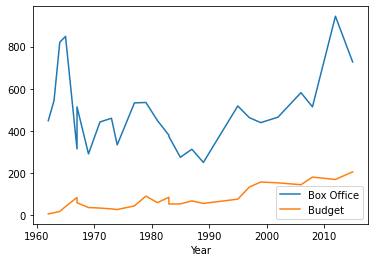

In [ ]:
# Chart 1
df_jamesbond.set_index("Year")[["Box Office","Budget"]].plot()

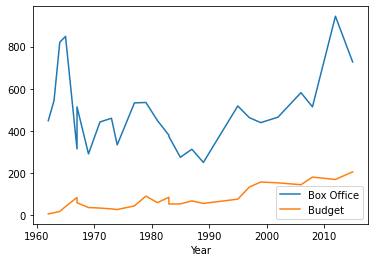

In [ ]:
# Exporting a chart
plot = df_jamesbond.set_index("Year")[["Box Office","Budget"]].plot()
plot.get_figure().savefig('my_chart.png')

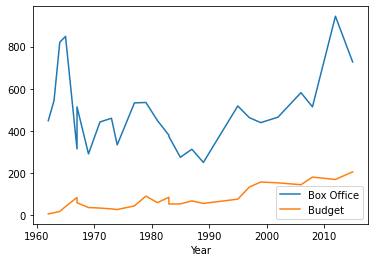

In [ ]:
# Chart 2
df_jamesbond.plot(
    kind='line'                 # type of chart
    ,x='Year'                   # Axis X
    ,y=["Box Office","Budget"]  # Axis Y
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14ada3a550>],
      dtype=object)

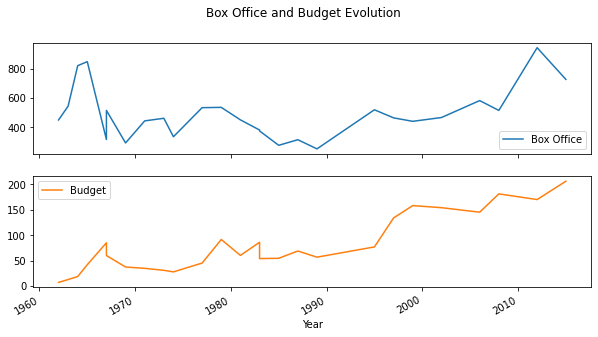

In [ ]:
# Chart 3
df_jamesbond.plot(
    kind='line'
    ,x='Year'
    ,y=["Box Office","Budget"]
    ,figsize=(10,5)                           # change size
    ,title='Box Office and Budget Evolution'  # chart title
    ,subplots=True                            # splitting into independent charts
    ,layout=(2,1)                             # suplots layout
)

# EDA: FREQUENCY
---
When exploring frequency, we meassure the number of times an event repeats.






In [ ]:
# Import df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

In [ ]:
# When applied to a categorical variable, the describe() method provides data on frequency
df_jamesbond["Director"].describe()

count            26
unique           13
top       John Glen
freq              5
Name: Director, dtype: object

In [ ]:
# The value_counts() method build a contingency table
df_jamesbond["Director"].value_counts()

John Glen             5
Guy Hamilton          4
Terence Young         3
Lewis Gilbert         3
Sam Mendes            2
Martin Campbell       2
Peter R. Hunt         1
Roger Spottiswoode    1
Ken Hughes            1
Marc Forster          1
Lee Tamahori          1
Irvin Kershner        1
Michael Apted         1
Name: Director, dtype: int64

In [ ]:
# The normalize parameter builds a contingency table with relative frequency
df_jamesbond["Director"].value_counts(normalize=True)

John Glen             0.192308
Guy Hamilton          0.153846
Terence Young         0.115385
Lewis Gilbert         0.115385
Sam Mendes            0.076923
Martin Campbell       0.076923
Peter R. Hunt         0.038462
Roger Spottiswoode    0.038462
Ken Hughes            0.038462
Marc Forster          0.038462
Lee Tamahori          0.038462
Irvin Kershner        0.038462
Michael Apted         0.038462
Name: Director, dtype: float64

In [ ]:
# We can get the frequency for more than one categorical variable combined
df_jamesbond[["Director","Actor"]].value_counts()

Director            Actor         
Terence Young       Sean Connery      3
John Glen           Roger Moore       3
Sam Mendes          Daniel Craig      2
Guy Hamilton        Sean Connery      2
John Glen           Timothy Dalton    2
Lewis Gilbert       Roger Moore       2
Guy Hamilton        Roger Moore       2
Marc Forster        Daniel Craig      1
Martin Campbell     Daniel Craig      1
                    Pierce Brosnan    1
Lee Tamahori        Pierce Brosnan    1
Ken Hughes          David Niven       1
Michael Apted       Pierce Brosnan    1
Peter R. Hunt       George Lazenby    1
Irvin Kershner      Sean Connery      1
Roger Spottiswoode  Pierce Brosnan    1
Lewis Gilbert       Sean Connery      1
dtype: int64

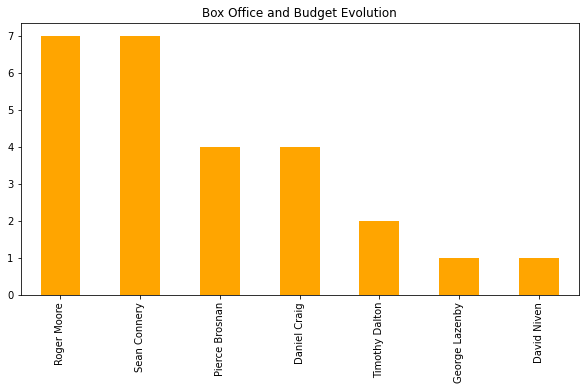

In [ ]:
# Frequency can be visualized using bar charts
df_jamesbond["Actor"].value_counts().plot(
    kind = 'bar'
    ,x='Actor'
    ,figsize=(10,5)                           
    ,title='Box Office and Budget Evolution'  
    ,color='orange'                           # change color 
    )

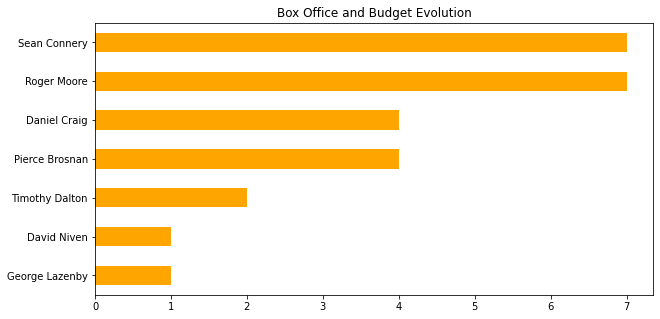

In [ ]:
# Changing chart to horizontal
df_jamesbond["Actor"].value_counts().sort_values().plot(
    kind = 'barh'
    ,x='Actor'
    ,figsize=(10,5)                           
    ,title='Box Office and Budget Evolution'  
    ,color='orange'                            
    )

# EDA: CORRELATION
---
When exploring correlation, we aim to measure the strength and direction of the association between two numerical variables.



In [ ]:
# Import df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

In [ ]:
# Calculate r (correlation coefficient)
scipy.stats.pearsonr(df_jamesbond["Box Office"],df_jamesbond["Budget"])

(0.28318466575203255, 0.1609638785608065)

In [ ]:
# Building a correlation matrix
df_jamesbond[["Box Office","Budget","Bond Actor Salary"]].corr()

,Box Office,Budget,Bond Actor Salary
Box Office,1.000000,0.283185,0.069542
Budget,0.283185,1.000000,0.728390
Bond Actor Salary,0.069542,0.728390,1.000000


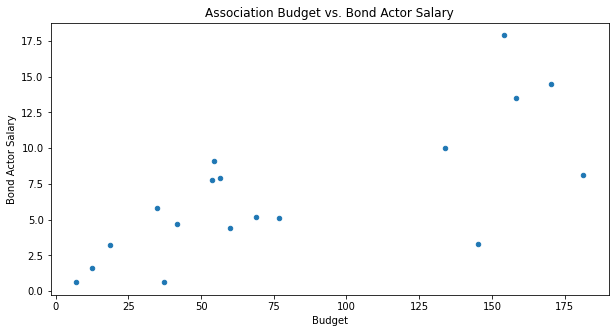

In [ ]:
# Plotting a scatter plot
df_jamesbond.plot(
    kind="scatter"               # chart type scatter
    ,x="Budget"
    ,y="Bond Actor Salary"
    ,title='Association Budget vs. Bond Actor Salary'
    ,figsize=(10,5) 
)

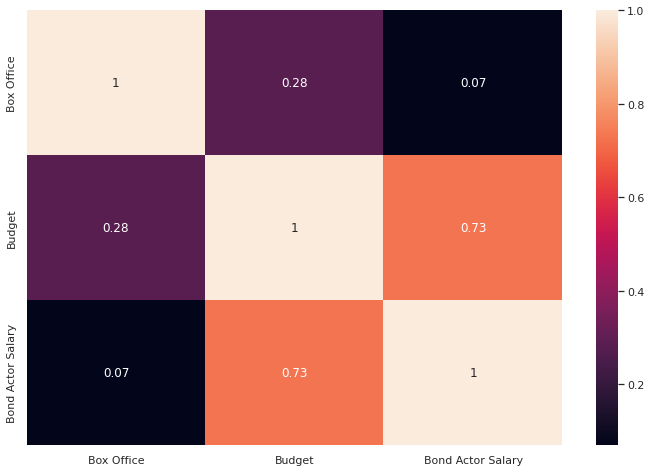

In [ ]:
# plotting a heatmap to visualize correlation matrix
sn.set(rc={'figure.figsize':(12,8)})
corrMatrix= df_jamesbond[["Box Office","Budget","Bond Actor Salary"]].corr()
sn.heatmap(corrMatrix, annot=True)

# EDA: DISTRIBUTION
---
When studying distribution, we aim to understand how disperse or concentrated a numerical variable is.




In [ ]:
# Import df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

In [ ]:
# Using describe() to review distribution
df_jamesbond[["Box Office","Budget","Bond Actor Salary"]].describe()

,Box Office,Budget,Bond Actor Salary
count,26.000000,26.000000,18.000000
mean,491.611538,80.719231,6.850000
std,176.740396,57.097608,4.805175
min,250.900000,7.000000,0.600000
25%,375.350000,38.450000,3.575000
50%,461.750000,60.050000,5.500000
75%,534.500000,123.300000,8.850000
max,943.500000,206.300000,17.900000


In [ ]:
# Changing the distribution
df_jamesbond[['Box Office','Budget','Bond Actor Salary']].describe(
    percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # especificamos cómo queremos la distribución
    ).T # pivotamos la tabla para pasar de una tabla larga a una ancha

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
Box Office,26.0,491.611538,176.740396,250.9,302.50,334.00,409.75,448.80,461.75,514.20,525.75,543.80,773.55,943.5
Budget,26.0,80.719231,57.097608,7.0,23.15,34.70,43.50,54.50,60.05,76.90,88.75,145.30,164.25,206.3
Bond Actor Salary,18.0,6.850000,4.805175,0.6,1.30,3.24,4.43,5.02,5.50,7.82,8.08,9.64,13.80,17.9


In [ ]:
# Extracting distribution metrics
df_jamesbond['Bond Actor Salary'].quantile(0.25)

3.5749999999999997

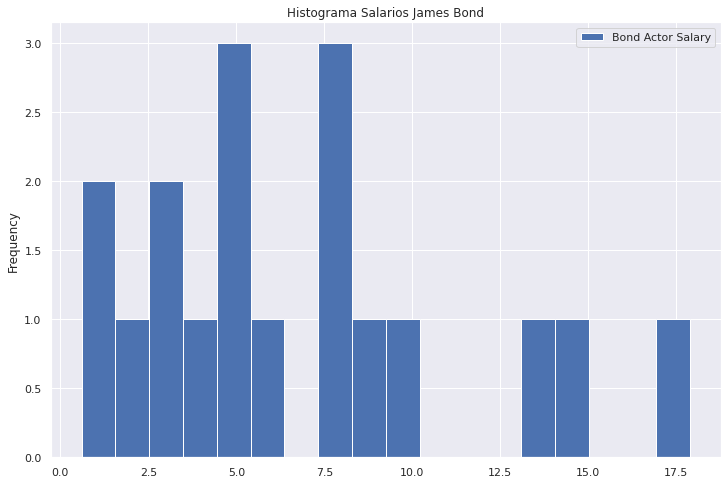

In [ ]:
# Plotting a histogram
df_jamesbond.plot(
    kind='hist'
    ,y='Bond Actor Salary'
    ,bins=18
    ,title='Histograma Salarios James Bond'
)

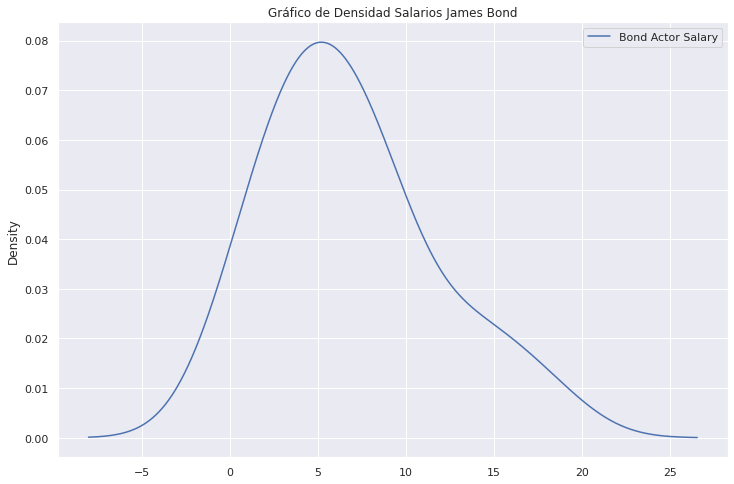

In [ ]:
# Plotting a density plot
df_jamesbond.plot(
    kind='density'
    ,y='Bond Actor Salary'
    ,title='Gráfico de Densidad Salarios James Bond'
)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


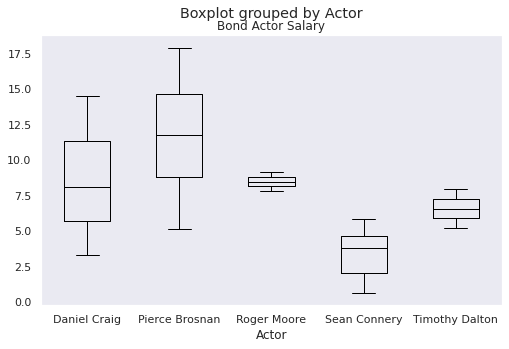

In [ ]:
# Plotting a boxplot
cond = df_jamesbond["Actor"].isin(['Sean Connery','Daniel Craig','Roger Moore','Pierce Brosnan','Timothy Dalton'])
df_jamesbond[cond].boxplot(
    by ='Actor'
    ,column ='Bond Actor Salary'
    ,grid = False
    ,color = 'black'
    ,figsize=(8,5)
)

# EDA: DISPERSION MATRIX
---
A dispersion matrix combines histograms and scatter plots for numerical variables.

In [ ]:
# Import df
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14a2305a10>,
      dtype=object)

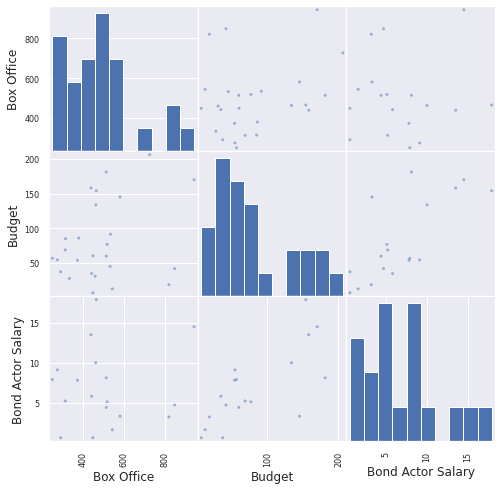

In [ ]:
# Plotting a scatter matrix
scatter_matrix(df_jamesbond[['Box Office','Budget','Bond Actor Salary']],figsize=(8,8))

# EXERCISES
---

##### EX 1: EDA Time Series
---
How did evolve "high" opening rates on Amazon stocks since 2017?

> Dataset https://data-wizards.s3.amazonaws.com/datasets/amzn_stocks.csv





In [ ]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
from matplotlib.pyplot import figure
from scipy import stats
from pandas.plotting import scatter_matrix

In [ ]:
# importing df
df_amzn = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/amzn_stocks.csv")
df_amzn.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

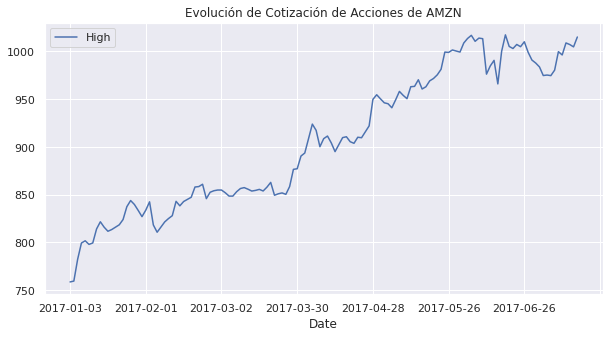

In [ ]:
# EX 1
df_amzn[df_amzn["Date"]>'2017-01-01'].plot(
    kind='line'
    ,x='Date' 
    ,y='High'
    ,figsize=(10,5)
    ,title='Evolución de Cotización de Acciones de AMZN'
)


##### EX 2: EDA Frequency/ Correlation
---

##### EX 2.A: How many directors are inclured in the dataset?
##### EX 2.B: Pull top 10 variables with highest correlation with variable "IMDB score"

> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv


In [ ]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
from matplotlib.pyplot import figure
from scipy import stats
from pandas.plotting import scatter_matrix

In [ ]:
# importing df
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [ ]:
# EX 4.A
df_movies["director_name"].describe()

count                 4814
unique                2397
top       Steven Spielberg
freq                    26
Name: director_name, dtype: object

In [ ]:
# EX 4.B
df_movies.corr().sort_values("imdb_score",ascending=False).iloc[1:11,]["imdb_score"]

num_voted_users              0.412427
num_critic_for_reviews       0.309733
num_user_for_reviews         0.295779
duration                     0.264440
movie_facebook_likes         0.252496
gross                        0.199914
director_facebook_likes      0.173969
cast_total_facebook_likes    0.086830
actor_2_facebook_likes       0.083761
actor_1_facebook_likes       0.077070
Name: imdb_score, dtype: float64

##### EX 3: Distribution
---
Select top 5% action movies with highest IMDB score.
> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv

In [ ]:
import pandas as pd
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [ ]:
cond = df_movies.genres.str.contains('Action',case=False)
dist_95 = df_movies[cond].imdb_score.quantile(0.95)

In [ ]:
cond = df_movies.genres.str.contains('Action',case=False)
cond_2 = df_movies.imdb_score >= dist_95

df_movies[cond & cond_2]\
  .loc[:,['movie_title','genres','imdb_score']]\
  .sort_values('imdb_score',ascending=False)

,movie_title,genres,imdb_score
4312,Kickboxer: Vengeance,Action,9.1
66,The Dark Knight,Action|Crime|Drama|Thriller,9.0
335,The Lord of the Rings: The Return of the King,Action|Adventure|Drama|Fantasy,8.9
2031,Star Wars: Episode V - The Empire Strikes Back,Action|Adventure|Fantasy|Sci-Fi,8.8
97,Inception,Action|Adventure|Sci-Fi|Thriller,8.8
453,Daredevil,Action|Adventure|Crime|Drama|Sci-Fi|Thriller,8.8
267,The Lord of the Rings: The Fellowship of the Ring,Action|Adventure|Drama|Fantasy,8.8
4635,Seven Samurai,Action|Adventure|Drama,8.7
647,The Matrix,Action|Sci-Fi,8.7
2973,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,8.7


##### EX 4: Distribution
---
What can we infer about the distribution of the GDP per capita by continent? Build a boxplot

> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv



In [ ]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
from matplotlib.pyplot import figure
from scipy import stats
from pandas.plotting import scatter_matrix

In [ ]:
# importing df
df_who = pd.read_csv('https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv')
df_who.dtypes

Country                                                    object
CountryID                                                   int64
ContinentID                                                 int64
Adolescent fertility rate (%)                             float64
Adult literacy rate (%)                                   float64
Gross national income per capita (PPP international $)    float64
Net primary school enrolment ratio female (%)             float64
Net primary school enrolment ratio male (%)               float64
Population (in thousands) total                           float64
Population annual growth rate (%)                         float64
Population in urban areas (%)                             float64
Population living below the poverty line                  float64
Continent                                                  object
dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


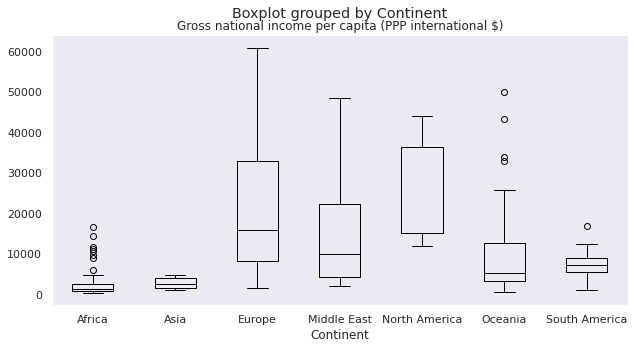

In [ ]:
df_who.boxplot(
    by ='Continent'
    ,column ='Gross national income per capita (PPP international $)'
    ,grid = False
    ,color = 'black'
    ,figsize=(10,5)
)